<a href="https://colab.research.google.com/github/Shreyas-13/Tensorflow-Developer/blob/main/02_NeuralNetwork__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification

Types of classifications:
  * Binary Classification
  * Multi-class Classification
  * Multi-label Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

## Make 1000 samples
n_samples = 1000

## Create Circles
X, y = make_circles(n_samples, noise=.03, random_state=42)

In [2]:
## Features and Labels
print('Features-', X[:10])
print('Target-', y[:10])

Features- [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
Target- [1 1 1 1 0 1 1 1 1 0]


In [3]:
import pandas as pd

df = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'Y':y})
df.head()

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


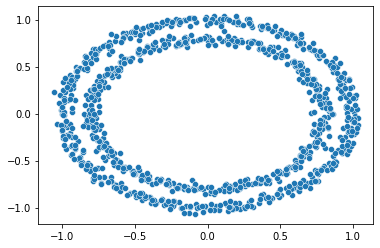

In [4]:
## Visulaize
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="darkgrid", palette="deep")

sns.scatterplot(X[:, 0], X[:, 1], cmap='RdYlBu')

In [5]:
## Shape of data

print('Features Shape-', X.shape, '\nTarget Shape-', y.shape)

Features Shape- (1000, 2) 
Target Shape- (1000,)


### Steps in modelling

1. Create or import a model
2. Compile
3. Fit
4. Evaluate
5. Tweak
6. Repeat

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(df[['X0', 'X1']],
                                                    df[['Y']], 
                                                    test_size=.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = tf.keras.Sequential([
                            #  tf.keras.Input(shape=X_train.shape),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

(800, 2) (200, 2) (800, 1) (200, 1)


In [7]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 1.0000


[0.29140326380729675, 1.0]

### Visualizing model prediction

Create a function `plot_decision_boundary()`:
* Take trained model feature (X) and label (y).
* Create a meshgrid of different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as the lines between zones (where each unique class falls)

***Note - Used ```mlxtend.plotting``` to plot the decision boundary***

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


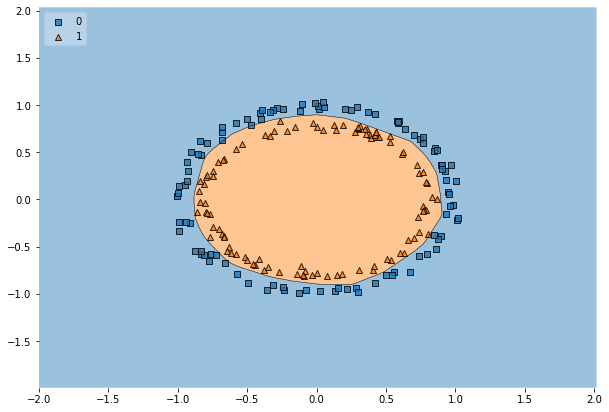

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,7))

plot_decision_regions(X_test.to_numpy(), y_test.to_numpy().ravel(), clf=model,
                      legend=2)

### Make Moons

In [9]:
from sklearn.datasets import make_moons

n_samples = 3000

X, y = make_moons(n_samples, noise=.1, random_state=42)

print(X[:10], y[:10])

[[ 0.06109728 -0.14774355]
 [-0.89271911  0.57291225]
 [ 0.34345014 -0.15428805]
 [ 0.82703518  0.50047614]
 [ 1.46968705 -0.36676552]
 [-0.64219452  0.80624398]
 [-0.88271967  0.38907118]
 [ 0.7747464  -0.23591078]
 [ 0.5785075   0.96375404]
 [ 1.59893412 -0.29908906]] [1 0 1 0 1 0 0 1 0 1]


In [10]:
import pandas as pd

## Converting to dataframe
df2 = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'y':y})
df2.head()

,X0,X1,y
0,0.061097,-0.147744,1
1,-0.892719,0.572912,0
2,0.343450,-0.154288,1
3,0.827035,0.500476,0
4,1.469687,-0.366766,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


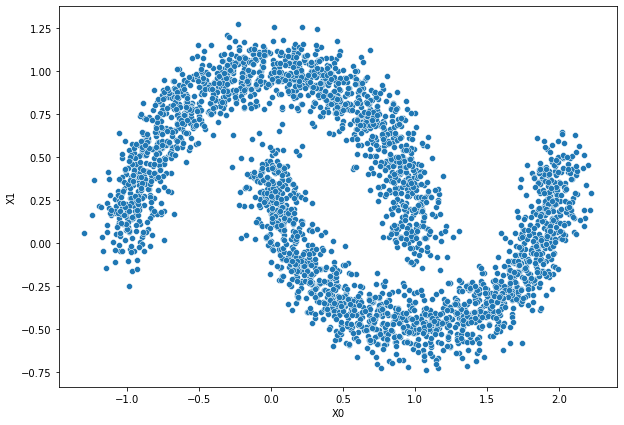

In [11]:
## Visualizing the data
plt.figure(figsize=(10,7))

sns.scatterplot(df2['X0'], df2['X1'])

### Defining a Callback

Callback functions are defined to stop the training if the evaluation metric has already been achieved and hence there is no need to train the data any further.

Callback functions can also be used to find the best possible learning rate.

In [12]:
class metricCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.99):
      print('Stop Training. Accuracy achieved 99%')
      self.model.stop_training = True

obj = metricCallback()

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(df2[['X0', 'X1']], df2['y'],
                                                    random_state=42)

model2 = tf.keras.Sequential([
                              # tf.keras.Input(shape=(3000, 2)),
                              tf.keras.layers.Dense(units=16, activation='relu'),
                              tf.keras.layers.Dense(units=64, activation='relu'),
                              tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr=.01),
               metrics = ['accuracy'])

history = model2.fit(X_train, y_train, epochs=200, callbacks=obj)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


71/71 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8782
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9520
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9907


In [14]:
model2.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9960


[0.01718614622950554, 0.9959999918937683]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


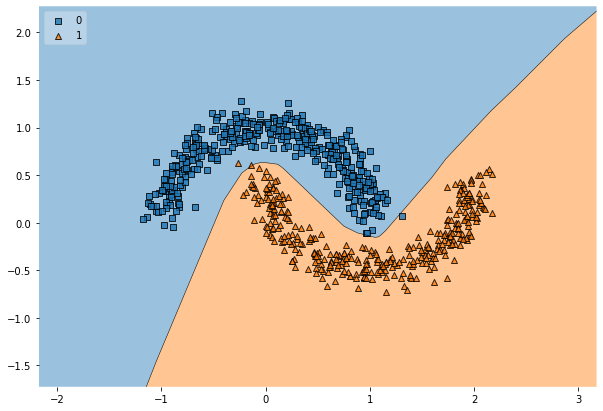

In [15]:
from mlxtend.plotting import plot_decision_regions as pdr

plt.figure(figsize=(10,7))

pdr(X_test.to_numpy(), y_test.ravel(), clf=model2, legend=2)

### Finding the best learning rate

In [16]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20))

In [17]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(4, activation='relu'),
                    tf.keras.layers.Dense(units=4, activation='relu'),
                    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer='Adam',
               metrics=['accuracy'])



history3 = model3.fit(X_train, y_train, epochs=200, callbacks=[obj, lr_scheduler])

Epoch 1/200
71/71 [==============================] - 1s 2ms/step - loss: 0.7005 - accuracy: 0.4889 - lr: 1.0000e-04
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.4907 - lr: 1.1220e-04
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.4956 - lr: 1.2589e-04
Epoch 4/200
71/71 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.5058 - lr: 1.4125e-04
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.5182 - lr: 1.5849e-04
Epoch 6/200
71/71 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.5178 - lr: 1.7783e-04
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.5329 - lr: 1.9953e-04
Epoch 8/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.5898 - lr: 2.2387e-04
Epoch 9/200
71/71 [==============================] - 0s 3ms/step - loss:

In [18]:
model3.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9960


[0.026973815634846687, 0.9959999918937683]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


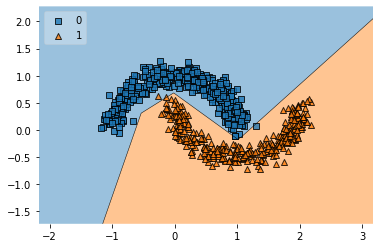

In [19]:
pdr(X_test.to_numpy(), y_test.ravel(), clf=model3, legend=2)

In [20]:
hist = pd.DataFrame(history3.history)
hist.head()

,loss,accuracy,lr
0,0.700460,0.488889,0.000100
1,0.687079,0.490667,0.000112
2,0.672661,0.495556,0.000126
3,0.657248,0.505778,0.000141
4,0.640941,0.518222,0.000158


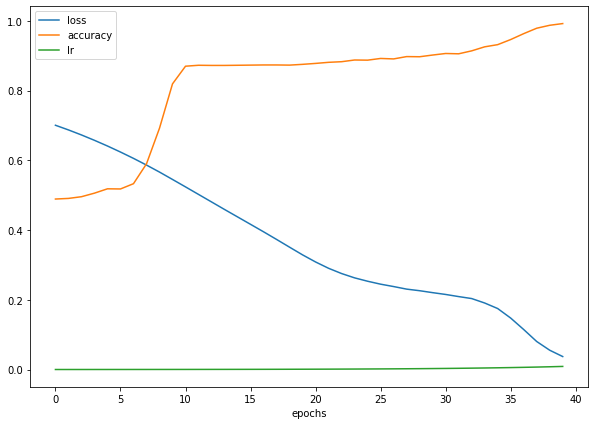

In [21]:

hist.plot(figsize=(10,7), xlabel='epochs')
# plt.xlabel(xlabel = 'epochs')

Text(0.5, 1.0, 'Loss vs Learning Rate')

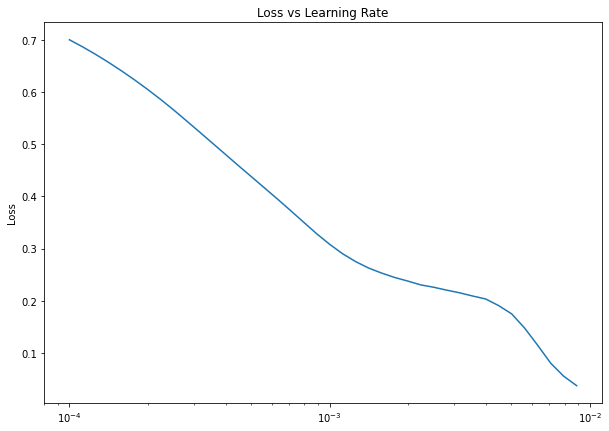

In [22]:
### Plotting learning rate vs loss to find the best possible learning rate

lrs = 1e-4 * (10 ** (tf.range(40)/20)) ##40 coz training ends at epoch 40
plt.figure(figsize=(10,7))
# plt.xlabel('Learning Rate')
plt.semilogx(lrs, history3.history['loss'])

plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')

***Usually the best learning rate is 10X times smaller than the lowest point on the curve which in our case is ((10^-2)/10)***

### Classification evaluation metrics

* Accuracy
* Precision - High Precision leads to low False Positives
* Recall - High Recall leads to low False Negatives
* F1- Score - Good overall classifiaction metric
* Confusion Matrix
* Classification Report (sklearn)

In [23]:
## Check the accuracy of model

loss, accuracy = model3.evaluate(X_test, y_test)
print('Model loss on test set: {}'.format(loss))
print('Model accuracy on test set: {:.2f}%'.format(accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9960
Model loss on test set: 0.026973815634846687
Model accuracy on test set: 99.60%


In [24]:
## Print all the other metrics

'''tf.round is used because sigmoid activation function produces the probability 
of a data point belonging to certain class so to change that probability we've 
used round function'''

from sklearn.metrics import classification_report

print(classification_report(y_test, tf.round(model3.predict(X_test).ravel())))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      0.99      1.00       349

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



### Confusion Matrix




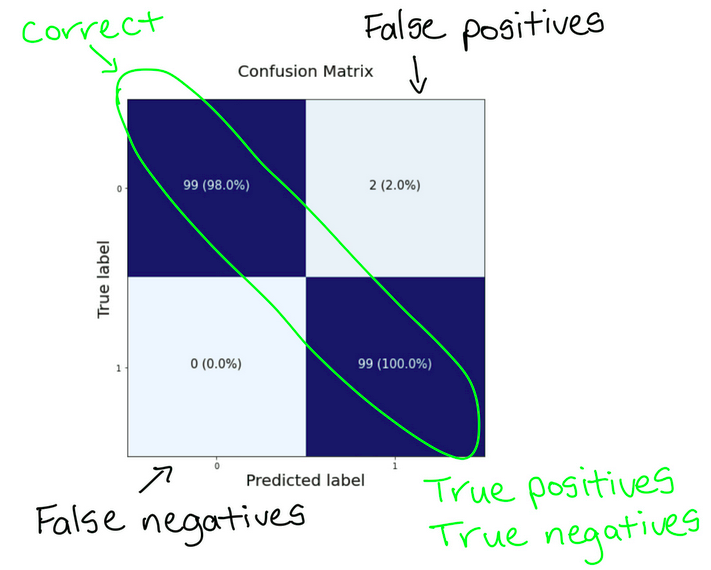

* True Positives - True Label is 1 and Predicted Label is 1

* True Negative - True Label is 0 and Predicted Label is 0

* False Positive - True label is 0 but Predicted label is 1

* False Negative - True label is 1 but Predicted label is 0

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbda87dd9d0>)

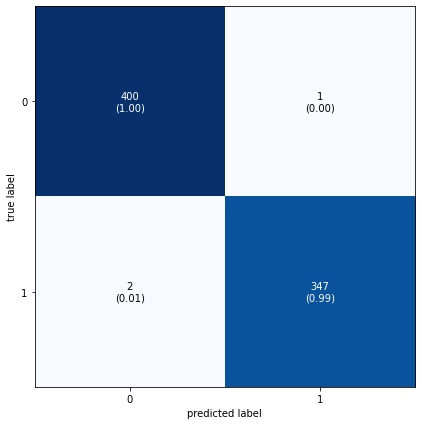

In [25]:
## Using mlxtend is better for easier visualization

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, tf.round(model3.predict(X_test)))
plot_confusion_matrix(cm, figsize=(10,7),
                      show_normed=True)

## Multi-Class Classification

For this we'll be using Fashion Mnist dataset with 60K training samples and 10K test samples

In [26]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [27]:
print(train_data.shape, train_labels.shape)

(60000, 28, 28) (60000,)


Each entry is a 28x28 matrix and we have 60K such entries 

In [28]:
import numpy as np


np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We can see that there are 10 unique classes form 0-9

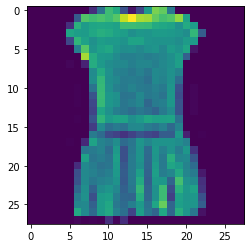

In [29]:
plt.imshow(train_data[3])
sns.set_style()

In [30]:
# Create a list to store numeric class labels to regular language

# Index of elements shows its class
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

Text(0.5, 1.0, 'Bag-8')

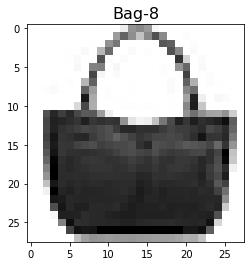

In [31]:
# Plot an example image

index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title('{}-{}'.format(class_names[train_labels[index]], train_labels[index]),
          fontsize=16)

In [32]:
## Function to plot images to familiarize with the dataset
import random

def plot_images():
  plt.figure(figsize=(10,10))

  for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title('{}-{}'.format(class_names[train_labels[rand_index]],
                           train_labels[rand_index]), fontsize=16)
    plt.axis(False)

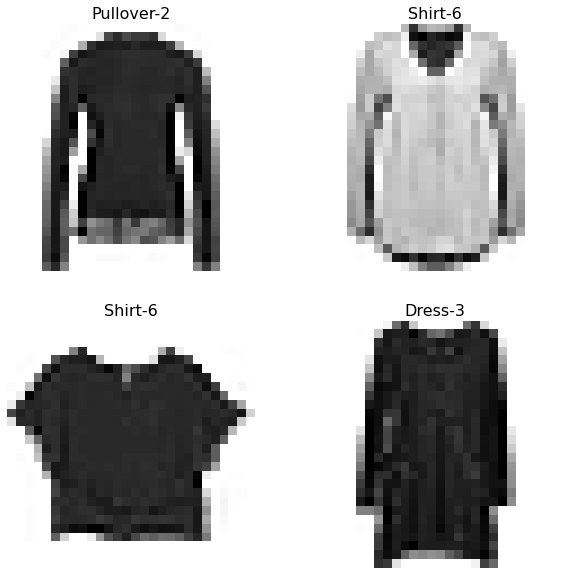

In [33]:
plot_images()

### Building a multi class classification model

Architecture of NN

  * Input Shape = 28*28
  * Output Shape = 10
  * Loss Func = SparseCategoricalCrossentropy
  * Output Activation = Softmax

📝 - **If labels are one-hot encoded then use CategoricalCrossEntropy otherwise if it is in integer form like [0,3,2,1....] then use SparseCategoricalCrossentropy.**

In [34]:
## Create a model
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(units=32, activation='relu'),
                        tf.keras.layers.Dense(units=64, activation='relu'),
                        tf.keras.layers.Dense(units=10, 
                                    activation=tf.keras.activations.softmax)   
])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

non_norm_history = model4.fit(train_data, train_labels, epochs=20,
                              validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6023 - accuracy: 0.4635 - val_loss: 1.1160 - val_accuracy: 0.5538
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9950 - accuracy: 0.5977 - val_loss: 0.9773 - val_accuracy: 0.6208
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9487 - accuracy: 0.6156 - val_loss: 0.9236 - val_accuracy: 0.6089
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9283 - accuracy: 0.6229 - val_loss: 0.9581 - val_accuracy: 0.6172
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9015 - accuracy: 0.6264 - val_loss: 0.9004 - val_accuracy: 0.6277
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8765 - accuracy: 0.6321 - val_loss: 0.8829 - val_accuracy: 0.6293
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8781 - accuracy: 0.6323 - val_loss: 0.8976 - val_accuracy:

In [35]:
## In the previous model we didn't normalize our data, so normalize the data to 
## see if there are any improvements

'''To normalize the data we divide it by he max value present in the dataset'''

print('Data range before normalization: ', train_data.min(), ',' , 
      train_data.max())

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

print('Data range after normalization: ', train_data_norm.min(), ',' ,
      train_data_norm.max())

Data range before normalization:  0 , 255
Data range after normalization:  0.0 , 1.0


In [36]:
##Using the same previous model again

model5 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(units=32, 
                                                    activation='relu'),
                              tf.keras.layers.Dense(units=64, 
                                                    activation='relu'),
                              tf.keras.layers.Dense(units=10,
                                                    activation='softmax')
])

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

norm_history = model5.fit(train_data_norm, train_labels,
                          epochs=20, 
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5343 - accuracy: 0.8125 - val_loss: 0.4403 - val_accuracy: 0.8414
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3948 - accuracy: 0.8586 - val_loss: 0.4704 - val_accuracy: 0.8391
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3591 - accuracy: 0.8687 - val_loss: 0.4058 - val_accuracy: 0.8502
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3377 - accuracy: 0.8767 - val_loss: 0.3966 - val_accuracy: 0.8589
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3223 - accuracy: 0.8807 - val_loss: 0.3769 - val_accuracy: 0.8636
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3087 - accuracy: 0.8852 - val_loss: 0.3848 - val_accuracy: 0.8542
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3002 - accuracy: 0.8886 - val_loss: 0.3889 - val_accuracy:


Normalized data works way better than the raw data. NNs tend to prefer normalized/scaled data.


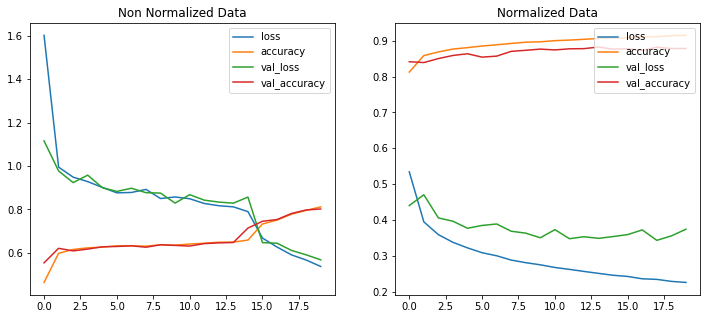

In [37]:
## Plotting non normalized vs normalized data
fig, axes = plt.subplots(1,2)
pd.DataFrame(non_norm_history.history).plot(ax=axes[0], figsize=(12,5), 
                                            title='Non Normalized Data')
pd.DataFrame(norm_history.history).plot(ax=axes[1], figsize=(12,5),
                                        title='Normalized Data',
                                        )
plt.legend(loc='upper right')

In [38]:
tf.random.set_seed(42)

# Create model

model6 = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(units=32, activation='relu'),
                        tf.keras.layers.Dense(units=64, activation='relu'),
                        tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile
model6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Create the lr_scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch/20)
)

# Fitting the model
history = model6.fit(train_data_norm,
                    train_labels,
                    epochs=30,
                    validation_data=(test_data_norm, test_labels),
                    callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5287 - accuracy: 0.8153 - val_loss: 0.4422 - val_accuracy: 0.8398 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8578 - val_loss: 0.4516 - val_accuracy: 0.8421 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3627 - accuracy: 0.8680 - val_loss: 0.4259 - val_accuracy: 0.8417 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3450 - accuracy: 0.8750 - val_loss: 0.4053 - val_accuracy: 0.8599 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3334 - accuracy: 0.8778 - val_loss: 0.3898 - val_accuracy: 0.8608 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3245 - accuracy: 0.8806 - val_loss: 0.4010 - val_accuracy: 0.8591 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 4s

In [39]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.528721,0.815350,0.442194,0.8398,0.001000
1,0.394246,0.857817,0.451621,0.8421,0.001122
2,0.362690,0.867967,0.425940,0.8417,0.001259
3,0.345047,0.875000,0.405335,0.8599,0.001413
4,0.333384,0.877817,0.389793,0.8608,0.001585


No handles with labels found to put in legend.


Text(0, 0.5, 'Loss')

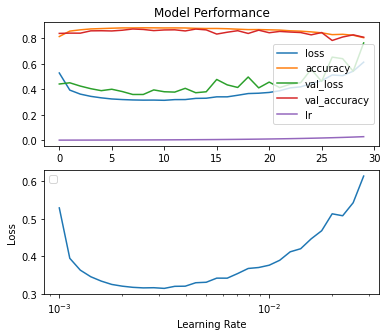

In [40]:
fig, axes = plt.subplots(2,1)

df.plot(ax=axes[0], title='Model Performance', figsize=(6, 5))
plt.legend(loc="upper left")
# plt.tight_layout()
plt.semilogx(df.lr, df.loss)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

***Ideal LR = 10^-3***

In [41]:
#Building a model with ideal lr

tf.random.set_seed(42)

# Create model

model7 = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(units=32, activation='relu'),
                        tf.keras.layers.Dense(units=64, activation='relu'),
                        tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile
model7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(.001),
               metrics=['accuracy'])

# Fitting the model
history = model7.fit(train_data_norm,
                    train_labels,
                    epochs=100,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5287 - accuracy: 0.8153 - val_loss: 0.4422 - val_accuracy: 0.8398
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3924 - accuracy: 0.8588 - val_loss: 0.4438 - val_accuracy: 0.8438
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3581 - accuracy: 0.8697 - val_loss: 0.4055 - val_accuracy: 0.8524
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8781 - val_loss: 0.3872 - val_accuracy: 0.8599
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3213 - accuracy: 0.8822 - val_loss: 0.3834 - val_accuracy: 0.8618
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3082 - accuracy: 0.8864 - val_loss: 0.3732 - val_accuracy: 0.8654
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2999 - accuracy: 0.8893 - val_loss: 0.3812 - val_ac

### Evaluating the model
  * Confusion Matrix
  * Asses model through visualization
  * Improve results through longer training

In [42]:
from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

y_probs = model7.predict(test_data_norm)
y_preds = tf.argmax(y_probs, axis=1)

print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.85      0.89      0.87      1000
           4       0.78      0.80      0.79      1000
           5       0.97      0.94      0.96      1000
           6       0.72      0.70      0.71      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [43]:
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(
    conf_mat,
    hide_spines=False,
    hide_ticks=False,
    figsize=None,
    cmap=None,
    colorbar=False,
    show_absolute=True,
    show_normed=False,
    norm_colormap=None,
    class_names=None,
    figure=None,
    axis=None,
    fontcolor_threshold=0.5,
):
    """Plot a confusion matrix via matplotlib.
    Parameters
    -----------
    conf_mat : array-like, shape = [n_classes, n_classes]
        Confusion matrix from evaluate.confusion matrix.
    hide_spines : bool (default: False)
        Hides axis spines if True.
    hide_ticks : bool (default: False)
        Hides axis ticks if True
    figsize : tuple (default: (2.5, 2.5))
        Height and width of the figure
    cmap : matplotlib colormap (default: `None`)
        Uses matplotlib.pyplot.cm.Blues if `None`
    colorbar : bool (default: False)
        Shows a colorbar if True
    show_absolute : bool (default: True)
        Shows absolute confusion matrix coefficients if True.
        At least one of  `show_absolute` or `show_normed`
        must be True.
    show_normed : bool (default: False)
        Shows normed confusion matrix coefficients if True.
        The normed confusion matrix coefficients give the
        proportion of training examples per class that are
        assigned the correct label.
        At least one of  `show_absolute` or `show_normed`
        must be True.
    norm_colormap : bool (default: False)
        Matplotlib color normalization object to normalize the
        color scale, e.g., `matplotlib.colors.LogNorm()`.
    class_names : array-like, shape = [n_classes] (default: None)
        List of class names.
        If not `None`, ticks will be set to these values.
    figure : None or Matplotlib figure  (default: None)
        If None will create a new figure.
    axis : None or Matplotlib figure axis (default: None)
        If None will create a new axis.
    fontcolor_threshold : Float (default: 0.5)
        Sets a threshold for choosing black and white font colors
        for the cells. By default all values larger than 0.5 times
        the maximum cell value are converted to white, and everything
        equal or smaller than 0.5 times the maximum cell value are converted
        to black.
    Returns
    -----------
    fig, ax : matplotlib.pyplot subplot objects
        Figure and axis elements of the subplot.
    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
    """
    if not (show_absolute or show_normed):
        raise AssertionError("Both show_absolute and show_normed are False")
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError(
            "len(class_names) should be equal to number of" "classes in the dataset"
        )

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype("float") / total_samples

    if figure is None and axis is None:
        fig, ax = plt.subplots(figsize=figsize)
    elif axis is None:
        fig = figure
        ax = fig.add_subplot(1, 1, 1)
    else:
        fig, ax = figure, axis

    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat) * 1.25, len(conf_mat) * 1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap, norm=norm_colormap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap, norm=norm_colormap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                num = conf_mat[i, j].astype(np.int64)
                cell_text += format(num, "d")
                if show_normed:
                    cell_text += "\n" + "("
                    cell_text += format(normed_conf_mat[i, j], ".2f") + ")"
            else:
                cell_text += format(normed_conf_mat[i, j], ".2f")

            if show_normed:
                ax.text(
                    x=j,
                    y=i,
                    s=cell_text,
                    va="center",
                    ha="center",
                    color=(
                        "white"
                        if normed_conf_mat[i, j] > 1 * fontcolor_threshold
                        else "black"
                    ),
                )
            else:
                ax.text(
                    x=j,
                    y=i,
                    s=cell_text,
                    va="center",
                    ha="center",
                    color="white"
                    if conf_mat[i, j] > np.max(conf_mat) * fontcolor_threshold
                    else "black",
                )
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(
            tick_marks, class_names, rotation=45, ha="right", rotation_mode="anchor"
        )
        plt.yticks(tick_marks, class_names)

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel("predicted label")
    plt.ylabel("true label")
    return fig, ax

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbda9210a50>)

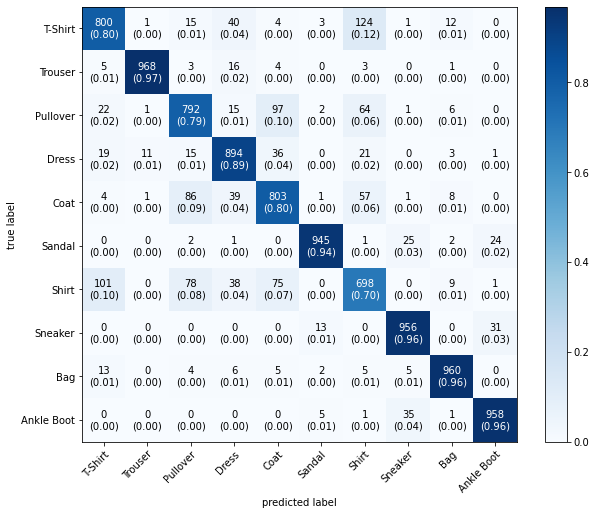

In [44]:
# Confusion matrix

cm = confusion_matrix(test_labels, y_preds)

plot_confusion_matrix(cm, figsize=(10, 8), colorbar=True,
                      show_normed=True, class_names=class_names)

Visualizing the ground truth and the predicted label.

`plot_random_image()`
  * Plot random image
  * Make predictions on said image
  * Label the plot with truth label and predicted label

In [45]:
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image and labels it with a prediction and truth label
  '''
  # Random integer
  i = random.randint(0, len(images))

  # Make predictions
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image)

  # Change the color of title if the prediction is right
  if (pred_label == true_label):
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True:{})'.format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
              color=color)

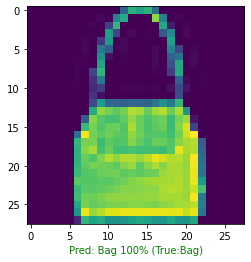

In [46]:
plot_random_image(model7, test_data_norm, test_labels, class_names)

### What patterns our model is learning?


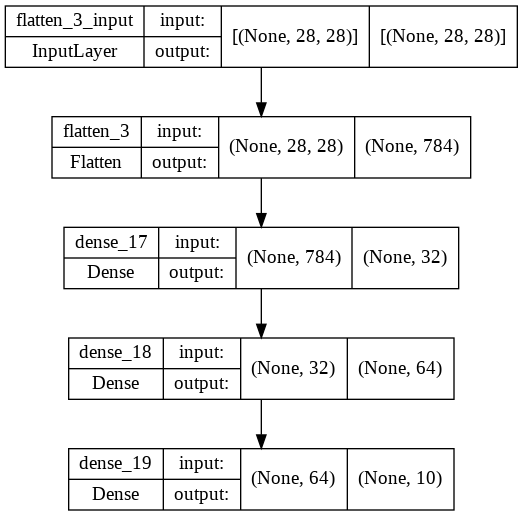

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model7, show_shapes=True)

In [48]:
model7.layers

In [49]:
weights, biases = model7.layers[1].get_weights()

weights, weights.shape

(array([[-1.3685968 , -0.01011726, -0.26403534, ..., -1.5837408 ,
          3.3438559 , -0.04501393],
        [-1.4414446 ,  0.16457374,  0.15239067, ..., -1.9793937 ,
         -1.1359018 ,  0.04285061],
        [-1.1981838 , -0.6872003 , -3.9380975 , ...,  1.0536821 ,
          1.5993906 ,  0.05892993],
        ...,
        [-0.8701573 ,  0.44664022,  0.86774224, ...,  0.14704652,
         -1.2707909 , -0.00959989],
        [-1.7635    ,  0.22439541,  1.4212726 , ..., -0.53381056,
          0.40102947, -0.04945768],
        [-3.1789095 ,  0.06017068, -0.7732007 , ...,  1.0338237 ,
         -1.1904671 , -0.01983955]], dtype=float32), (784, 32))


The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

In [50]:
biases, biases.shape

(array([-0.15189303,  0.6011737 ,  0.12969954,  1.3947687 ,  0.9094266 ,
         0.9260743 , -0.7956078 ,  0.16305715,  0.45894742, -0.01154723,
        -0.552435  , -0.01157568,  0.8096012 ,  0.04453711,  0.88022065,
        -1.2850223 , -0.92073894,  1.5321034 ,  0.37340963, -0.08815394,
         0.6188845 ,  1.3634521 ,  0.54132456,  0.35204178,  0.78495806,
        -0.03116236,  0.45559037,  0.02309324,  0.00833665, -0.7981957 ,
        -0.6267272 , -0.01347395], dtype=float32), (32,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

## Exercises

1. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [117]:
import seaborn_image as isns
import random

def plot_prediction_labels(model=model7, images=test_data_norm,
                           labels=test_labels, classes=class_names):

  fig, axes = plt.subplots(3, 2, figsize=(15,10))
  i, j = 0, 0

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.3, 
                    hspace=.3)

  for i in range(3):
    if (j > 1):
      j = 0

    index = random.randint(0, len(images))
    axes[i, j].imshow(images[index])
    j+=1

    y_prob = model.predict(images[index].reshape(1,28,28)).ravel()
    
    if labels[index] == tf.argmax(y_prob):
      color='teal'
    else:
      color='red'

    sns.barplot(x=list(range(10)), y=100*y_prob, ax=axes[i, j],
                color=color)
    j+=1
    # plt.tight_layout()
      

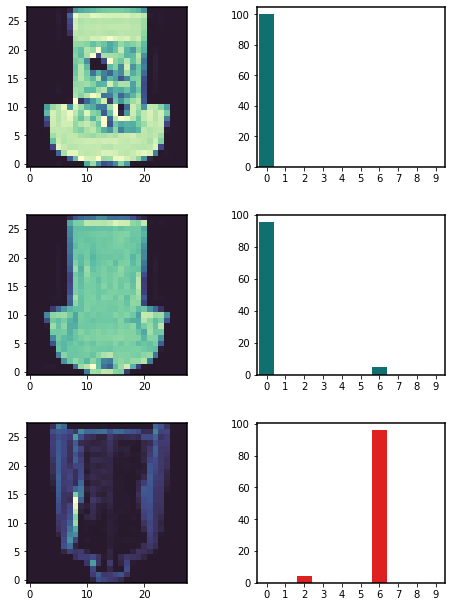

In [118]:
plot_prediction_labels()

2. Create Softmax Function

Ans - Softmax = np.exp(input_array)/np.sum(np.exp(input_array))

In [135]:
def softmax():
  x = [[1, 2, 3, 6],
      [2, 4, 5, 6],
      [3, 8, 7, 6]]

  num = (np.exp(x))
  den = (np.sum(np.exp(x), axis=1))

  for i, col in enumerate(num):
    print(col/den[i])

softmax()

[0.00626879 0.01704033 0.04632042 0.93037047]
[0.01203764 0.08894682 0.24178252 0.65723302]
[0.00446236 0.66227241 0.24363641 0.08962882]
